In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [36]:
class LogisticRegreesion:
    def __init__(self, lr=0.001, epochs=100) -> None:
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        # 初始化参数
        self.w = np.random.randn(X.shape[1])
        self.b = 0
        n = len(X)

        # 梯度下降
        for epoch in range(self.epochs):
            # 得到模型预测值
            y_hat = sigmoid(np.dot(X, self.w) + self.b)

            # 计算损失函数
            loss = max(0, (-1 / n) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

            # 计算梯度
            dw = (1 / n) * np.dot(X.T, (y_hat - y))
            db = (1 / n) * np.sum(y_hat - y)

            # 更新参数
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        y_hat = sigmoid(np.dot(X, self.w) + self.b)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0
        return y_hat

    def score(self, y_pred, y):
        return (y_pred == y).sum() / len(y)

In [40]:
iris = load_iris()
X, y = iris.data, iris.target
X.shape, y

((150, 4),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [37]:
model = LogisticRegreesion(lr=0.003, epochs=1000)
model.fit(X_train, y_train)

C:\Users\dell\AppData\Local\Temp\ipykernel_28608\1363537098.py:18: RuntimeWarning: divide by zero encountered in log
  loss = max(0, (-1 / n) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
C:\Users\dell\AppData\Local\Temp\ipykernel_28608\1363537098.py:18: RuntimeWarning: invalid value encountered in multiply
  loss = max(0, (-1 / n) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


In [38]:
y_pred = model.predict(X_test)
acc = model.score(y_pred, y_test)
acc

0.26666666666666666

Loss after iteration 0: 0.8596456262581385
Loss after iteration 10: 0.4752963130305963
Loss after iteration 20: 0.4602342626481633
Loss after iteration 30: 0.4503961824713643
Loss after iteration 40: 0.44095313689871707
Loss after iteration 50: 0.43187656988423134
Loss after iteration 60: 0.4231490461096585
Loss after iteration 70: 0.4147539430147388
Loss after iteration 80: 0.40667541367611404
Loss after iteration 90: 0.398898369230623
Loss after iteration 100: 0.39140845793959594
Loss after iteration 110: 0.3841920415518395
Loss after iteration 120: 0.3772361697059037
Loss after iteration 130: 0.3705285530031926
Loss after iteration 140: 0.36405753527956536
Loss after iteration 150: 0.3578120655109865
Loss after iteration 160: 0.3517816697083199
Loss after iteration 170: 0.345956423086735
Loss after iteration 180: 0.34032692273549564
Loss after iteration 190: 0.3348842609631607
Loss after iteration 200: 0.3296199994504365
Loss after iteration 210: 0.32452614430715154
Loss after itera

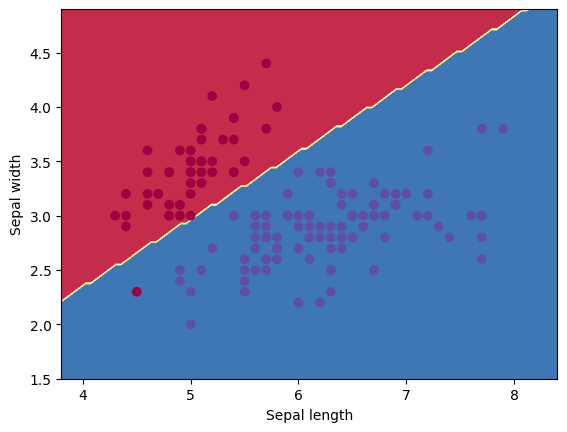

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 设置随机种子
seed_value = 2023
np.random.seed(seed_value)

# Sigmoid激活函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 定义逻辑回归算法
class LogisticRegression:
    def __init__(self, learning_rate=0.003, iterations=100):
        self.learning_rate = learning_rate # 学习率
        self.iterations = iterations # 迭代次数

    def fit(self, X, y):
        # 初始化参数
        self.weights = np.random.randn(X.shape[1])
        self.bias = 0

        # 梯度下降
        for i in range(self.iterations):
            # 计算sigmoid函数的预测值, y_hat = w * x + b
            y_hat = sigmoid(np.dot(X, self.weights) + self.bias)

            # 计算损失函数
            loss = (-1 / len(X)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

            # 计算梯度
            dw = (1 / len(X)) * np.dot(X.T, (y_hat - y))
            db = (1 / len(X)) * np.sum(y_hat - y)

            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # 打印损失函数值
            if i % 10 == 0:
                print(f"Loss after iteration {i}: {loss}")

    # 预测
    def predict(self, X):
        y_hat = sigmoid(np.dot(X, self.weights) + self.bias)
        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0
        return y_hat
    
    # 精度
    def score(self, y_pred, y):
        accuracy = (y_pred == y).sum() / len(y)
        return accuracy

# 导入数据
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# 划分训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed_value)

# 训练模型
model = LogisticRegression(learning_rate=0.03, iterations=1000)
model.fit(X_train, y_train)

# 结果
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

score_train = model.score(y_train_pred, y_train)
score_test = model.score(y_test_pred, y_test)

print('训练集Accuracy: ', score_train)
print('测试集Accuracy: ', score_test)

# 可视化决策边界
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()
